## KNN - Classifiaction and Regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import math

# KNN CLASSIFIER

class KNNClassifier:
   
    def __init__(self, k=3):
        self.k = k
       
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
       
    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
   
    def _predict(self, x):
       
        distances = np.linalg.norm(self.X_train - x, axis=1)
       
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
       
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



# KNN REGRESSOR

class KNNRegressor:
   
    def __init__(self, k=3):
        self.k = k
       
    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
       
    def predict(self, X):
        X = np.array(X)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
   
    def _predict(self, x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
       
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_values = self.y_train[k_indices]
       
        return np.mean(k_nearest_values)


=================KNN Classification=======================
Accuracy: 1.0


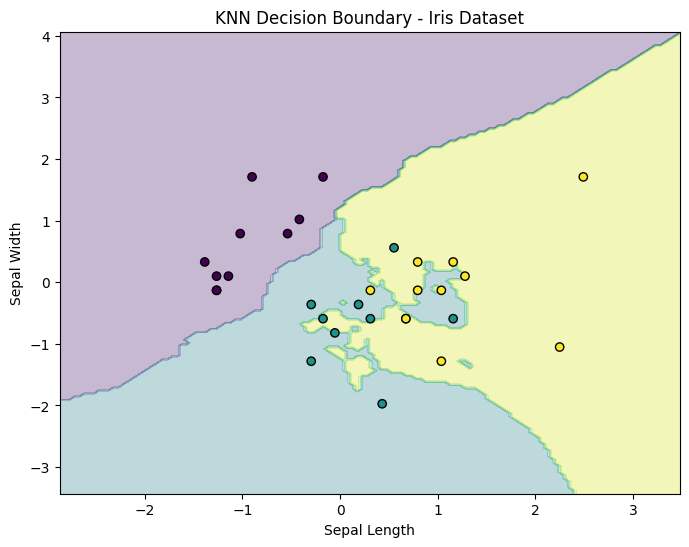

=================KNN Regression=======================
MSE: 18.72448971518988
RMSE: 4.327180342346489


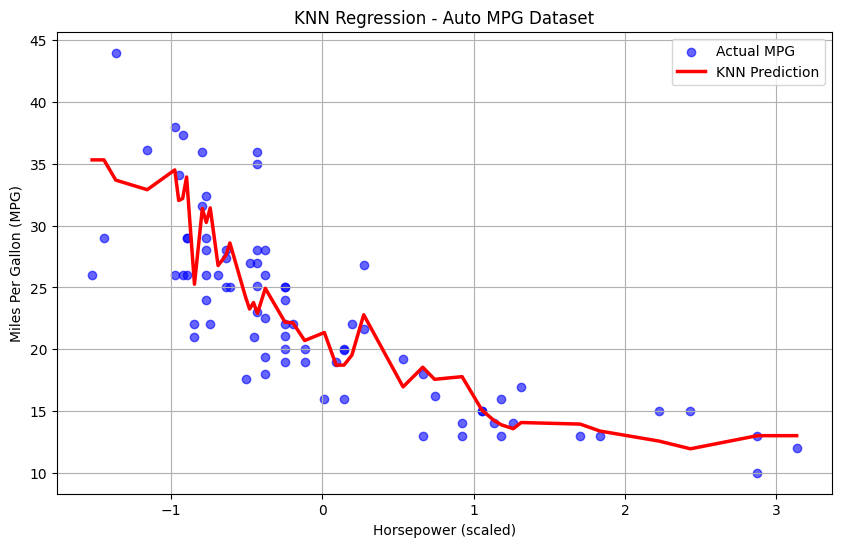

In [17]:

# CLASSIFICATION EXAMPLE


# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


clf = KNNClassifier(k=5)
clf.fit(X_train, y_train)


predictions = clf.predict(X_test)
print("=================KNN Classification=======================")
print("Accuracy:", accuracy_score(y_test, predictions))


# Use only first 2 features for visualization
X_vis = iris.data[:, :2]
y = iris.target


scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

X_train, X_test, y_train, y_test = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

clf.fit(X_train, y_train)

plt.figure(figsize=(8, 6))


x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.05),
    np.arange(y_min, y_max, 0.05)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = clf.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k')
plt.title("KNN Decision Boundary - Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()



# Load Auto MPG dataset directly from UCI
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
data = pd.read_csv(url)

# Keep only horsepower and mpg
data = data[['horsepower', 'mpg']].dropna()

X = data[['horsepower']].values
y = data['mpg'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


reg = KNNRegressor(k=8)
reg.fit(X_train, y_train)


predictions = reg.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)

print("=================KNN Regression=======================")
print("MSE:", mse)
print("RMSE:", rmse)


sorted_idx = np.argsort(X_test[:, 0])
X_sorted = X_test[sorted_idx]
y_sorted = y_test[sorted_idx]
pred_sorted = predictions[sorted_idx]

plt.figure(figsize=(10, 6))

plt.scatter(X_sorted, y_sorted, color='blue', alpha=0.6, label="Actual MPG")
plt.plot(X_sorted, pred_sorted, color='red', linewidth=2.5, label="KNN Prediction")

plt.title("KNN Regression - Auto MPG Dataset")
plt.xlabel("Horsepower (scaled)")
plt.ylabel("Miles Per Gallon (MPG)")
plt.legend()
plt.grid(True)
plt.show()